# Univariate Feature Performance using Feature-Engine by `Mr. Harshit Dawar!`

In [2]:
# Loading the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from feature_engine.selection import SelectBySingleFeaturePerformance
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Loading the Dataset
data = pd.read_csv("../../ds/dataset_2.csv")

In [4]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,target,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,5.751633,2.808895,1.244055,11.269688,15.866550,0.00,1.181500e+00,1.903910,4.667888,1.842749,5.863767,0.115498,2.398785,0.139191,11.860244,4.433561,7.135750,2.240605,3.720161,5.805012,1.308222,0.133272,5.514540,11.510708,7.534482,8.779925,6.797556,8.504757,0.188741,8.783980,15.698044,0.035042,1.860657,1.736770,6.443298e-07,9.411215,6.236506,1.82,0.849346,1.629826,12.412388,3.400224,9.329826,0.056875,1.534238,3.976040,14.086948,5.738625,7.161002,1.106342,1,3.756560,0.848060,1.307758,0.500280,14.439678,13.005608,0.938697,1.88,12.866988,11.369994,1.467595,10.043070,8.174325,2.088815,0.134455,1.282842,1.262513,1.114369,1.446358,15.512397,1.820403,0.619730,0.826138,6.880270,1.680353,8.659387,10.184313,7.248146,17.065003,0.0,1.044600,0.176036,9.869159,4.662407e-01,7.273476,0.623398,2.070677,1.108609,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,8.225109,2.001220,8.081647,3.933986,14.350374,0.00,1.244384e+01,1.575456,5.275010,2.750981,3.402345,0.227527,2.502344,0.197449,12.654514,3.895271,9.230702,0.719196,3.393035,6.055243,0.926661,0.221227,7.406060,10.290955,8.075000,10.034637,6.182029,7.698029,0.295115,10.308592,15.140132,0.137162,1.634830,1.124584,1.673459e-02,10.473282,4.432994,0.96,1.350589,1.567088,5.307235,10.541619,4.655548,0.142864,1.154133,2.434253,9.552176,5.335898,4.540389,2.074389,0,1.583407,1.865679,3.401134,0.878958,5.864243,12.998473,1.820000,0.94,10.477765,3.026453,1.338741,16.136215,8.659485,0.567717,0.108499,1.447928,0.583342,4.454525,3.570452,15.988817,2.628892,1.251810,2.077105,7.453729,2.173920,10.357143,13.274292,8.647012,17.143991,0.0,1.161626,0.214995,8.661069,9.585002e-01,6.475936,1.230876,2.249656,0.615216,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,8.307318,3.239122,2.699376,10.030416,14.977220,0.00,7.636780e-07,2.605838,5.459521,3.437779,5.498281,19.800000,2.136717,19.036815,11.938497,4.378310,6.843868,1.745698,3.721307,6.339151,1.479797,18.600001,8.142160,12.575593,6.752941,6.303391,5.327748,7.559745,16.951823,7.701432,14.501621,13.230928,2.812556,1.598376,1.560430e-07,9.387755,9.687344,0.99,0.770143,2.085602,4.166562,6.913110,4.535706,5.019770,1.145594,3.177751,11.022966,5.187055,5.165106,1.346895,0,5.696174,0.868576,1.275738,0.475953,8.245941,14.269387,0.407564,0.92,12.795940,3.158102,2.084452,13.596735,7.136616,3.975333,19.199999,1.035094,1.039650,2.920388,18.194969,13.878539,4.177674,0.265892,0.949150,5.501881,1.545747,6.652942,10.219311,7.350044,15.865534,0.0,0.668244,0.207304,9.591838,1.426163e+00,7.552225,0.599195,1.872145,2.111624,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,5.769939,2.760518,4.067190,14.040960,15.363394,0.94,1.278596e+00,2.447368,4.622004,3.166859,5.746444,0.107650,1.819269,0.143555,12.384151,4.847826,8.501440,1.471080,3.3

In [5]:
data.shape

(50000, 109)

In [11]:
X = data.drop("target", axis = 1)
y = data.target

In [13]:
# Creating the classifiers to select the features from!
'''
The classifier will train the model using the feature alone at a time, & then outputs the performance, based on
which the features are selected!
'''
lr_classifier = LogisticRegression()
rf_classifier = RandomForestClassifier()

# Building the Feature Selector!
Feature_Selector_LR = SelectBySingleFeaturePerformance(variables = None,
                                                    estimator = lr_classifier,
                                                    scoring = "roc_auc",
                                                    cv = 5,
                                                    threshold = 0.5)


# Fitting the Feature Selector!
Feature_Selector_LR.fit(X, y)


SelectBySingleFeaturePerformance(cv=5, estimator=LogisticRegression(),
                                 threshold=0.5,
                                 variables=['var_1', 'var_2', 'var_3', 'var_4',
                                            'var_5', 'var_6', 'var_7', 'var_8',
                                            'var_9', 'var_10', 'var_11',
                                            'var_12', 'var_13', 'var_14',
                                            'var_15', 'var_16', 'var_17',
                                            'var_18', 'var_19', 'var_20',
                                            'var_21', 'var_22', 'var_23',
                                            'var_24', 'var_25', 'var_26',
                                            'var_27', 'var_28', 'var_29',
                                            'var_30', ...])

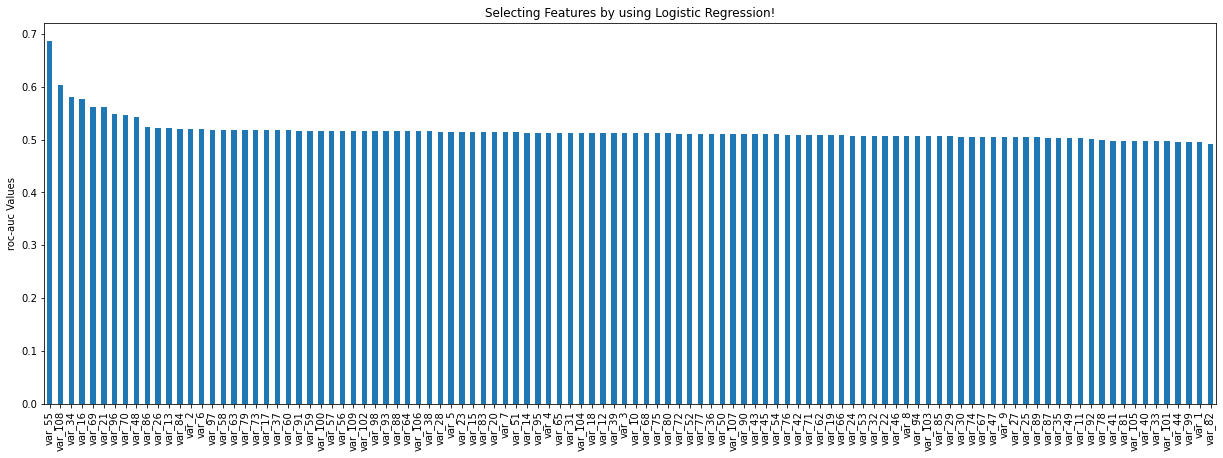

In [19]:
pd.Series(Feature_Selector_LR.feature_performance_).sort_values(ascending = False).plot(
    kind = "bar", figsize = (21, 7))

plt.ylabel("roc-auc Values")
plt.title("Selecting Features by using Logistic Regression!")
plt.show()

In [20]:
len(Feature_Selector_LR.features_to_drop_)

11

In [ ]:
Feature_Selector_RF = SelectBySingleFeaturePerformance(variables = None,
                                                    estimator = rf_classifier,
                                                    scoring = "roc_auc",
                                                    cv = 5,
                                                    threshold = 0.5)
Feature_Selector_RF.fit(X, y)